In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

In [170]:
df=pd.read_csv("data/survey.csv")

In [171]:
df.head(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


### UNDERSTANDING THE COLUMNS
* Timestamp
* Age
* Gender
* Country
* state: If you live in the United States, which state or territory do you live in?
* self_employed: Are you self-employed?
* family_history: Do you have a family history of mental illness?
* treatment: Have you sought treatment for a mental health condition?
* work_interfere: If you have a mental health condition, do you feel that it interferes with your work?
* no_employees: How many employees does your company or organization have?
* remote_work: Do you work remotely (outside of an office) at least 50% of the time?
* tech_company: Is your employer primarily a tech company/organization?
* benefits: Does your employer provide mental health benefits?
* care_options: Do you know the options for mental health care your employer provides?
* wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?
* seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?
* anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
* leave: How easy is it for you to take medical leave for a mental health condition?
* mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?
* physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?
* coworkers: Would you be willing to discuss a mental health issue with your coworkers?
* physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?
* mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?
* obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
* comments: Any additional notes or comments

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [173]:
#Number of missing values in each columns
df.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [174]:
#Irrelevant columns: columns that play no role in prediction and are better off dropped
df=df.drop(columns=["Timestamp", "comments"], axis=1)
df.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [175]:
df["Country"].value_counts()

Country
United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Th

In [176]:
df["state"].value_counts()

state
CA    138
WA     70
NY     57
TN     45
TX     44
OH     30
IL     29
OR     29
PA     29
IN     27
MI     22
MN     21
MA     20
FL     15
NC     14
VA     14
WI     12
GA     12
MO     12
UT     11
CO      9
MD      8
AL      8
AZ      7
OK      6
NJ      6
KY      5
SC      5
IA      4
CT      4
DC      4
NV      3
VT      3
SD      3
KS      3
NH      3
WY      2
NM      2
NE      2
WV      1
ID      1
MS      1
RI      1
LA      1
ME      1
Name: count, dtype: int64

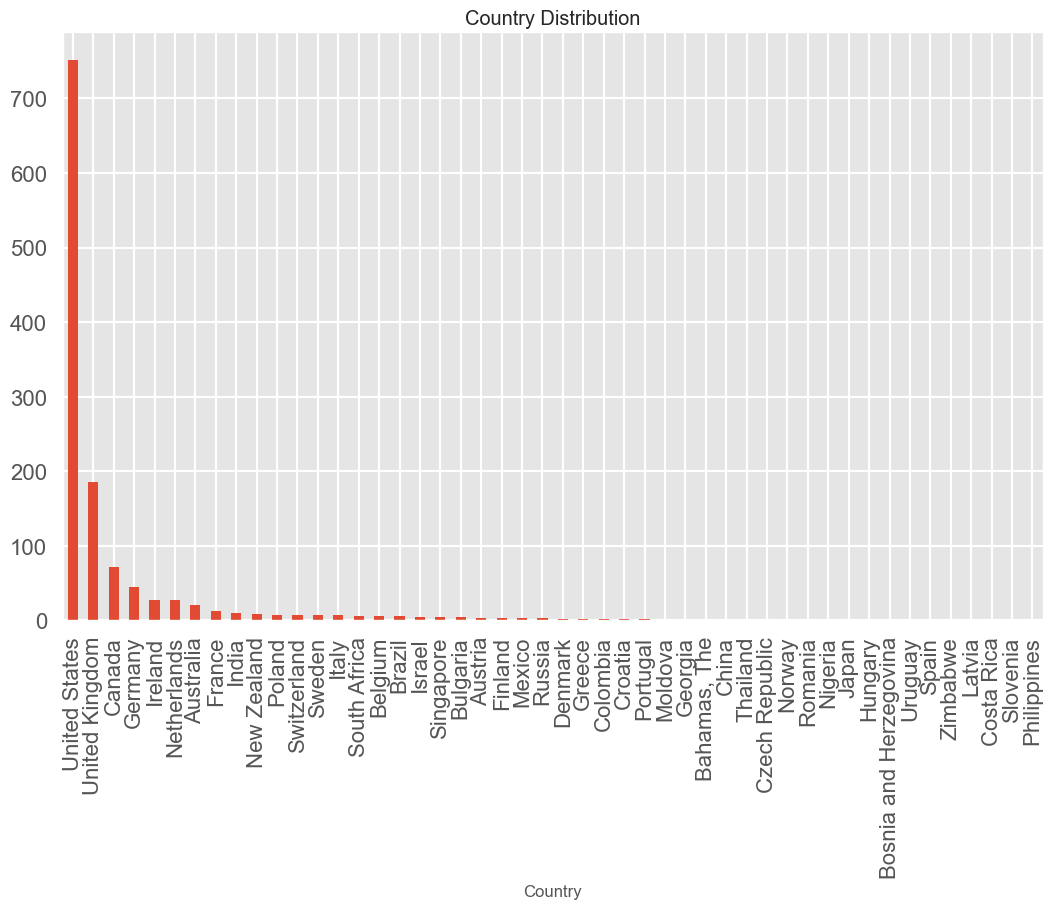

In [177]:
fig, ax =plt.subplots(figsize=(10,6))
df["Country"].value_counts().plot(kind="bar",ax=ax)
ax.set(title="Country Distribution")
plt.show()

In [178]:
#Its pretty pointless to consider country as something that affects mental health. And since states are only US states, its better to drop both columns.
df=df.drop(columns=["Country", "state"], axis=1)

In [179]:
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [180]:
#Age and Gender Column analysis
print(f"The ages are distributed as follows: \n\n{df["Age"].unique()}")
print("\n \n \n")
print(f"The genders are distributed as follows \n\n: {df["Gender"].unique()}")

The ages are distributed as follows: 

[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]

 
 

The genders are distributed as follows 

: ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 

#### It is obvious that some of the survey answers for 'Age' are outright false
#### The gender system can also be changed to 'Male', 'Female' and 'Other' to get a better basis 

In [181]:
df["Age"].value_counts()
#This shows that the bad answers for the 'Age' column is just a few in number, so they can outright be removed from our dataset

Age
 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 40             33
 39             33
 43             28
 22             21
 41             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 48              6
 50              6
 20              6
 51              5
 49              4
 56              4
 57              3
 54              3
 55              3
 47              2
 60              2
 99999999999     1
 5               1
-1               1
 11              1
 8               1
 61              1
 53              1
-29              1
-1726            1
 65              1
 62              1
 58              1
 329             1
 72     

In [182]:
df=df.drop(df[df["Age"]<0].index)
df=df.drop(df[df["Age"]>100].index)
df["Age"].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61,  8, 11, 72])

In [183]:
df["Gender"]=df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male')

df["Gender"]=df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female')

df["Gender"]=df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other')

df['Gender'].value_counts()

Gender
Male      988
Female    247
Other      19
Name: count, dtype: int64

In [184]:
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


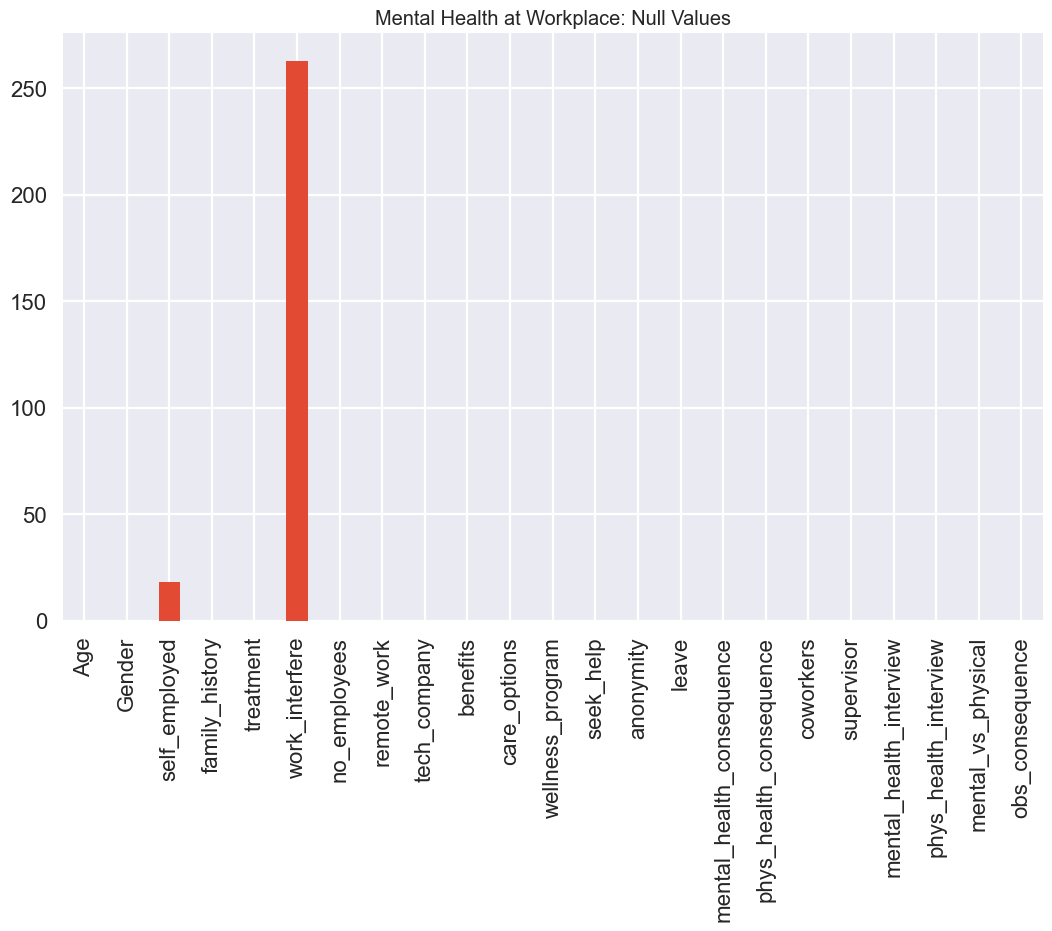

In [185]:
plt.style.use("seaborn-v0_8-darkgrid")
null_vals=df.isna().sum()
fig, ax=plt.subplots(figsize=(10,6))
null_vals.plot(kind="bar",ax=ax)
ax.set(title="Mental Health at Workplace: Null Values");

#### Now, we have null values in self_employed and work_interfere. It is objectively better to impute these values now itself

In [195]:
df["work_interfere"].value_counts(dropna=False),  df["self_employed"].value_counts(dropna=False)

(work_interfere
 Sometimes    464
 NaN          263
 Never        213
 Rarely       173
 Often        141
 Name: count, dtype: int64,
 self_employed
 No     1092
 Yes     144
 NaN      18
 Name: count, dtype: int64)

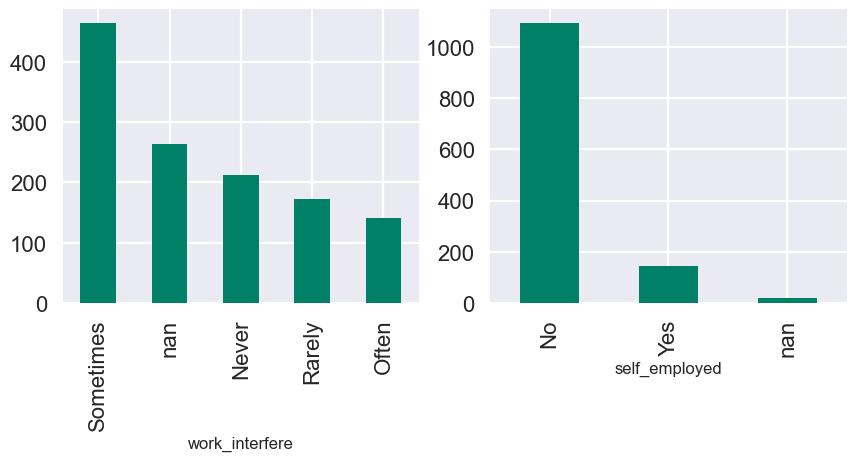

In [196]:
#Value Count Analysis of Null Valued Columns
plt.style.use("petroff10")
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8,3))
df["work_interfere"].value_counts(dropna=False).plot(kind="bar", cmap="summer", ax=ax1);
df["self_employed"].value_counts(dropna=False).plot(kind="bar", cmap="summer", ax=ax2);
plt.show()

* In the self employed column, it's obvious that NaN values are very few. So we can impute this column using the 'mode' stratergy
* In the work_interfere column, the NaN values are high, so we can fill it with a different category altogether, say 'Unknown'
#### Note: imputing is always done after the train-test data split so as to avoid data leakage. However, since both the filling stratergies being used are non-numerical, we can impute now.

In [197]:
#Imputing 

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

mode_features=["self_employed"]
work_features=["work_interfere"]

mode_imputer=SimpleImputer(strategy="most_frequent")
work_imputer=SimpleImputer(strategy="constant", fill_value="Unknown")

transform=ColumnTransformer([("mode_imputer", mode_imputer, mode_features),("work_imputer", work_imputer, work_features)],remainder="passthrough")
transformed_dataset=transform.fit_transform(df)

In [198]:
transformed_df = pd.DataFrame(
    transformed_dataset,
    columns=[col.split("__")[-1] for col in transform.get_feature_names_out()]
)

In [199]:
transformed_df.head()

,self_employed,work_interfere,Age,Gender,family_history,treatment,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,No,Often,37,Female,No,Yes,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,No,Rarely,44,Male,No,No,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,No,Rarely,32,Male,No,No,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,No,Often,31,Male,Yes,Yes,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,No,Never,31,Male,No,No,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [200]:
transformed_df.isna().sum()
#Finally, no more missing values

self_employed                0
work_interfere               0
Age                          0
Gender                       0
family_history               0
treatment                    0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

# EDA(Exploratory Data Analysis)

Our target variable/dependent variable is 'treatment', which shows whether the person has sought treatment or not

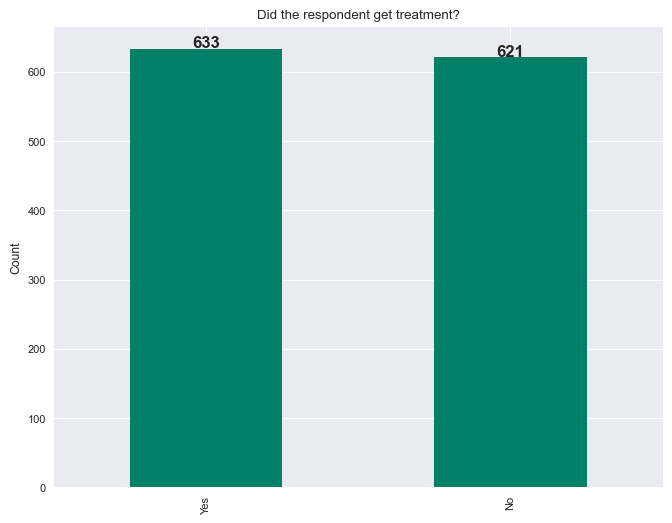

In [223]:
plt.style.use("seaborn-v0_8-darkgrid")
fig, ax=plt.subplots(figsize=(7,5))
bars=transformed_df["treatment"].value_counts().plot(kind="bar", ax=ax, cmap="summer")
ax.set(ylabel="Count", title="Did the respondent get treatment?",xlabel=None)

for p in bars.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,    # x: center of the bar
        p.get_height() + 2,               # y: slightly above the top
        int(p.get_height()),              # label: bar height as int
        ha='center', fontsize=12, weight='bold'
    )

    
plt.show()

This shows that our dataset is evenly split into two parts, people who get treatment, and people who don't

In [ ]:
#Let's one by one compare each column to the target variable, starting with gender
fig, ax=plt.subplots()
